In [ ]:
!pip install plantcv
# Import libraries
from plantcv import plantcv as pcv 

In [2]:
# Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib inline

In [7]:
class options:
    def __init__(self):
        self.image = "/home/grads/y/yashzambre/Desktop/YASH/test1.png"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

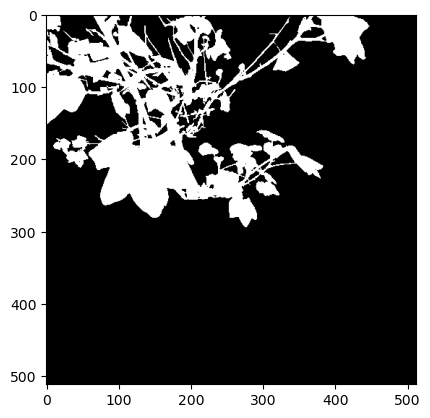

In [8]:
# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)


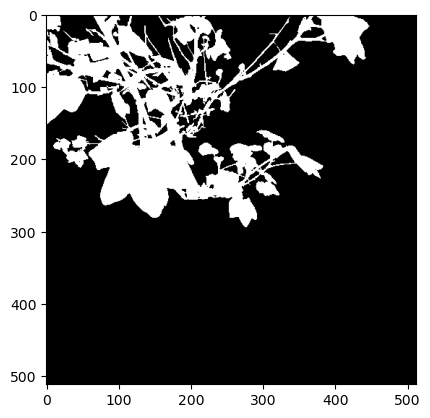

In [10]:
# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=img, threshold=85, max_value=255, object_type='light')

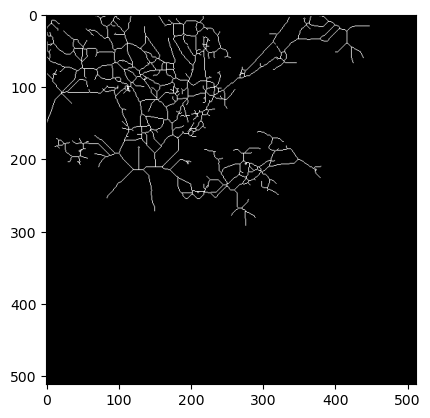

In [11]:
skeleton = pcv.morphology.skeletonize(s_thresh)

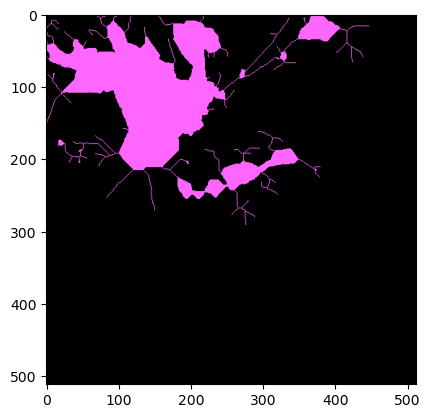

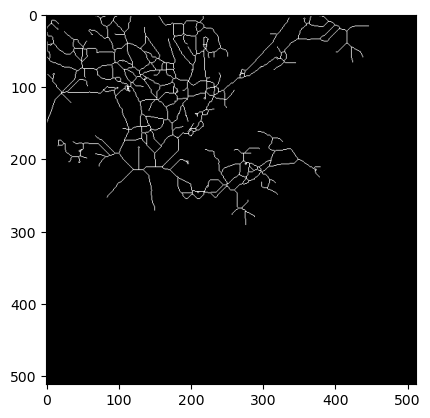

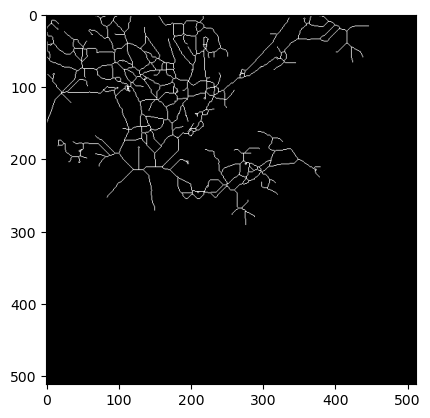

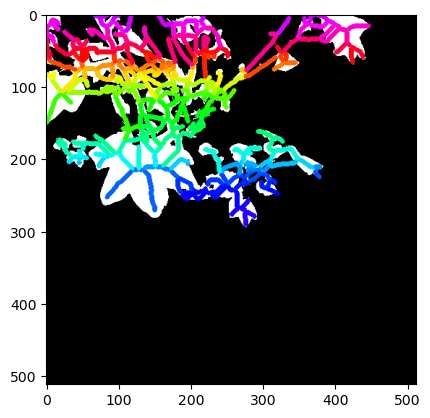

In [12]:
# Prune the skeleton  
# Generally, skeletonized images will have barbs (this image is particularly ideal, 
# that's why it's the example image in the tutorial!), 
# representing the width, that need to get pruned off. 

# Inputs:
#   skel_img = Skeletonized image
#   size     = Size to get pruned off each branch
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10, mask=s_thresh)


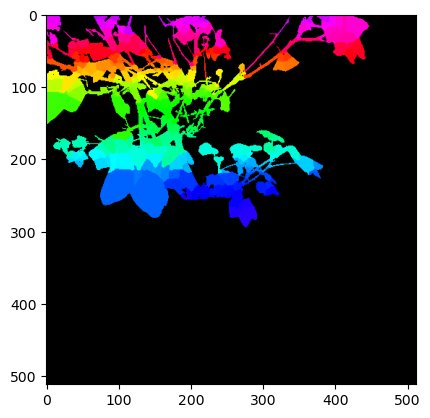

In [13]:
# Fill in segments (also stores out area data)  

# Inputs:
# mask         = Binary image, single channel, object = 1 and background = 0
# objects      = List of contours
# label        = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

filled_img = pcv.morphology.fill_segments(mask=s_thresh, objects=edge_objects, label="default")


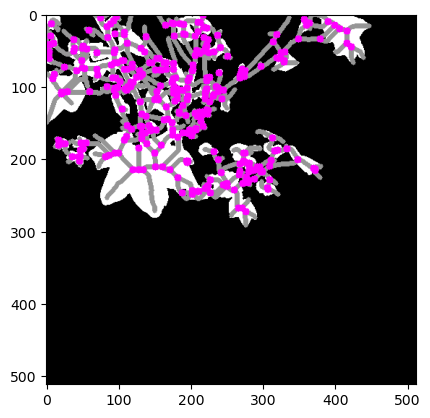

In [14]:
# Identify branch points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=s_thresh)

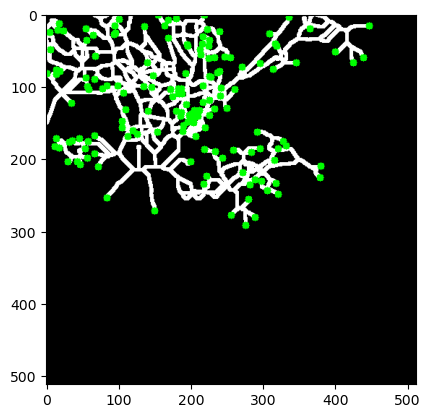

In [15]:
# Identify tip points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug 
#              image will be overlaid on the mask
#   label    = Optional label parameter, modifies the variable name of observations recorded. (def
# ault `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

tip_pts_mask = pcv.morphology.find_tips(skel_img=skeleton, mask=None, label="default")


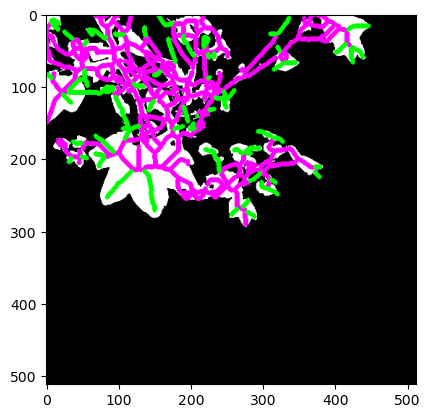

In [16]:
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
                                                 objects=edge_objects,
                                                 mask=s_thresh)

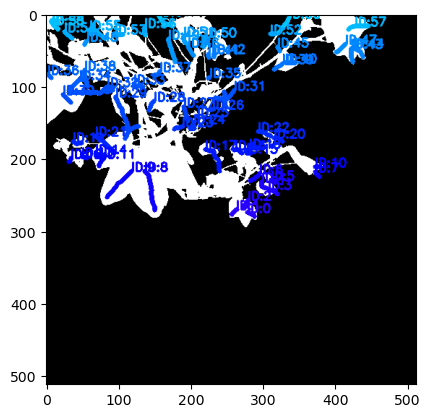

In [17]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                       objects=leaf_obj,
                                                       mask=s_thresh)

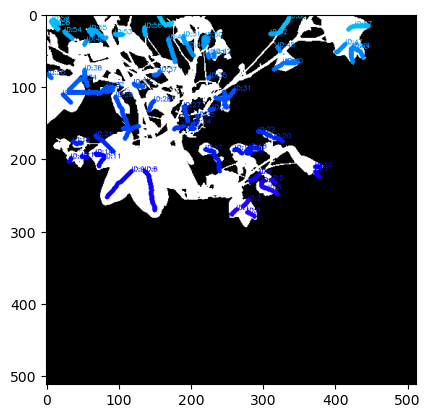

In [18]:
pcv.params.text_size=.3 # (default text_size=.55)
pcv.params.text_thickness=1 # (defaul text_thickness=2) 

segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                       objects=leaf_obj,
                                                       mask=s_thresh)

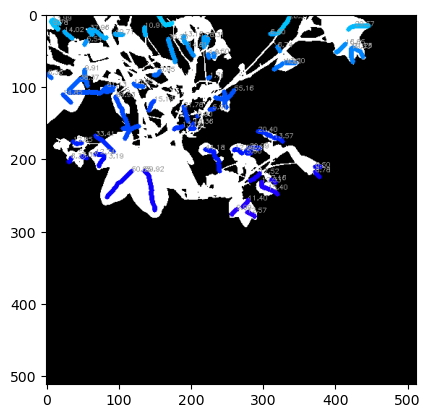

In [19]:
labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                  objects=leaf_obj, label="default")

In [20]:
labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img,
                                                        objects=leaf_obj, label="default")



RuntimeError: Too many tips found per segment, try pruning again